In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pulp
import time

# 会員データの内容確認

In [2]:
cust_df = pd.read_csv('./data/customers.csv')

In [3]:
cust_df.shape

(5000, 3)

In [4]:
cust_df.head()

,customer_id,age_cat,freq_cat
0,1,age20~34,freq2
1,2,age35~49,freq0
2,3,age35~49,freq0
3,4,age~19,freq0
4,5,age35~49,freq0


In [5]:
cust_df.dtypes

customer_id     int64
age_cat        object
freq_cat       object
dtype: object

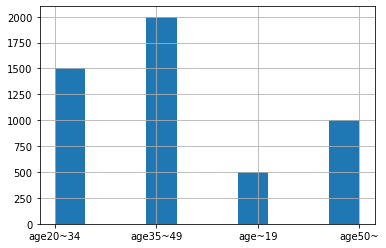

In [6]:
hist_age = cust_df['age_cat'].hist()
fig = hist_age.get_figure()

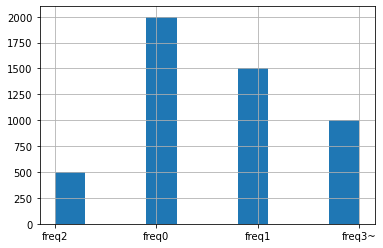

In [7]:
hist_freq = cust_df['freq_cat'].hist()
fig_freq = hist_freq.get_figure() 

In [8]:
cust_pivot_df = pd.pivot_table(
        data=cust_df,
        values='customer_id',
        columns='freq_cat',
        index='age_cat',
        aggfunc='count'
    )

cust_pivot_df = cust_pivot_df.reindex([
        'age~19',
        'age20~34',
        'age35~49',
        'age50~'
    ])

cust_pivot_df

freq_cat,freq0,freq1,freq2,freq3~
age_cat,,,,
age~19,200,150,50,100
age20~34,600,450,150,300
age35~49,800,600,200,400
age50~,400,300,100,200


<AxesSubplot:xlabel='freq_cat', ylabel='age_cat'>

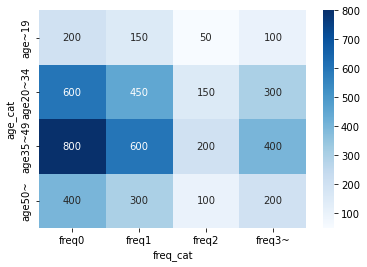

In [9]:
sns.heatmap(
    cust_pivot_df,
    annot=True,
    fmt='d',
    cmap='Blues'
)

# 来店率データの内容確認

In [10]:
prob_df = pd.read_csv("./data/visit_probability.csv")

In [11]:
prob_df.shape

(16, 6)

In [12]:
prob_df

,age_cat,freq_cat,segment_id,prob_dm1,prob_dm2,prob_dm3
0,age~19,freq0,1,0.07,0.12,0.29
1,age~19,freq1,2,0.21,0.30,0.58
2,age~19,freq2,3,0.28,0.39,0.74
3,age~19,freq3~,4,0.35,0.45,0.77
4,age20~34,freq0,5,0.11,0.17,0.37
5,age20~34,freq1,6,0.32,0.43,0.72
6,age20~34,freq2,7,0.42,0.55,0.93
7,age20~34,freq3~,8,0.52,0.63,0.94
8,age35~49,freq0,9,0.08,0.14,0.33
9,age35~49,freq1,10,0.25,0.35,0.67


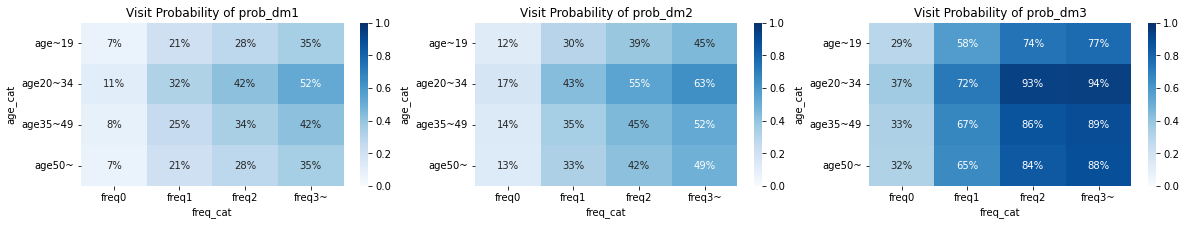

In [13]:
ax = {}
fig, (ax[0], ax[1], ax[2]) = plt.subplots(
    1,
    3,
    figsize=(20, 3)
)

for i, ptn in enumerate(['prob_dm1', 'prob_dm2', 'prob_dm3']):
    prob_pivot_df = pd.pivot_table(
    data=prob_df,
    values=ptn,
    columns='freq_cat',
    index='age_cat'
    )
    prob_pivot_df = prob_pivot_df.reindex([
        'age~19',
        'age20~34',
        'age35~49',
        'age50~'
    ])
    sns.heatmap(
        prob_pivot_df,
        vmin=0,
        vmax=1,
        annot=True,
        fmt='.0%',
        cmap='Blues',
        ax=ax[i]
    )
    ax[i].set_title(f'Visit Probability of {ptn}')

plt.show()

# 数理モデリングと実装

In [14]:
problem = pulp.LpProblem(
    name='DiscountCouponProblem1',
    sense=pulp.LpMaximize
)

In [15]:
I = cust_df['customer_id'].to_list()

In [16]:
M = [1, 2, 3]

In [17]:
xim = {}
for i in I:
    for m in M:
        xim[i, m] = pulp.LpVariable(
            name=f'xim({i}, {m})',
            cat='Binary'
        )
len(xim)

15000

In [18]:
xim


{(1, 1): xim(1,_1),
 (1, 2): xim(1,_2),
 (1, 3): xim(1,_3),
 (2, 1): xim(2,_1),
 (2, 2): xim(2,_2),
 (2, 3): xim(2,_3),
 (3, 1): xim(3,_1),
 (3, 2): xim(3,_2),
 (3, 3): xim(3,_3),
 (4, 1): xim(4,_1),
 (4, 2): xim(4,_2),
 (4, 3): xim(4,_3),
 (5, 1): xim(5,_1),
 (5, 2): xim(5,_2),
 (5, 3): xim(5,_3),
 (6, 1): xim(6,_1),
 (6, 2): xim(6,_2),
 (6, 3): xim(6,_3),
 (7, 1): xim(7,_1),
 (7, 2): xim(7,_2),
 (7, 3): xim(7,_3),
 (8, 1): xim(8,_1),
 (8, 2): xim(8,_2),
 (8, 3): xim(8,_3),
 (9, 1): xim(9,_1),
 (9, 2): xim(9,_2),
 (9, 3): xim(9,_3),
 (10, 1): xim(10,_1),
 (10, 2): xim(10,_2),
 (10, 3): xim(10,_3),
 (11, 1): xim(11,_1),
 (11, 2): xim(11,_2),
 (11, 3): xim(11,_3),
 (12, 1): xim(12,_1),
 (12, 2): xim(12,_2),
 (12, 3): xim(12,_3),
 (13, 1): xim(13,_1),
 (13, 2): xim(13,_2),
 (13, 3): xim(13,_3),
 (14, 1): xim(14,_1),
 (14, 2): xim(14,_2),
 (14, 3): xim(14,_3),
 (15, 1): xim(15,_1),
 (15, 2): xim(15,_2),
 (15, 3): xim(15,_3),
 (16, 1): xim(16,_1),
 (16, 2): xim(16,_2),
 (16, 3): xim(16,_3)

In [19]:
for i in I:
    problem += pulp.lpSum(xim[i, m] for m in M) == 1

In [20]:
problem

DiscountCouponProblem1:
MAXIMIZE
None
SUBJECT TO
_C1: xim(1,_1) + xim(1,_2) + xim(1,_3) = 1

_C2: xim(2,_1) + xim(2,_2) + xim(2,_3) = 1

_C3: xim(3,_1) + xim(3,_2) + xim(3,_3) = 1

_C4: xim(4,_1) + xim(4,_2) + xim(4,_3) = 1

_C5: xim(5,_1) + xim(5,_2) + xim(5,_3) = 1

_C6: xim(6,_1) + xim(6,_2) + xim(6,_3) = 1

_C7: xim(7,_1) + xim(7,_2) + xim(7,_3) = 1

_C8: xim(8,_1) + xim(8,_2) + xim(8,_3) = 1

_C9: xim(9,_1) + xim(9,_2) + xim(9,_3) = 1

_C10: xim(10,_1) + xim(10,_2) + xim(10,_3) = 1

_C11: xim(11,_1) + xim(11,_2) + xim(11,_3) = 1

_C12: xim(12,_1) + xim(12,_2) + xim(12,_3) = 1

_C13: xim(13,_1) + xim(13,_2) + xim(13,_3) = 1

_C14: xim(14,_1) + xim(14,_2) + xim(14,_3) = 1

_C15: xim(15,_1) + xim(15,_2) + xim(15,_3) = 1

_C16: xim(16,_1) + xim(16,_2) + xim(16,_3) = 1

_C17: xim(17,_1) + xim(17,_2) + xim(17,_3) = 1

_C18: xim(18,_1) + xim(18,_2) + xim(18,_3) = 1

_C19: xim(19,_1) + xim(19,_2) + xim(19,_3) = 1

_C20: xim(20,_1) + xim(20,_2) + xim(20,_3) = 1

_C21: xim(21,_1) + xim(21,_

In [21]:
keys = ['age_cat', 'freq_cat']
cust_prob_df = pd.merge(cust_df, prob_df, on=keys)
cust_prob_df

,customer_id,age_cat,freq_cat,segment_id,prob_dm1,prob_dm2,prob_dm3
0,1,age20~34,freq2,7,0.42,0.55,0.93
1,199,age20~34,freq2,7,0.42,0.55,0.93
2,200,age20~34,freq2,7,0.42,0.55,0.93
3,255,age20~34,freq2,7,0.42,0.55,0.93
4,269,age20~34,freq2,7,0.42,0.55,0.93
...,...,...,...,...,...,...,...
4995,4474,age~19,freq2,3,0.28,0.39,0.74
4996,4596,age~19,freq2,3,0.28,0.39,0.74
4997,4720,age~19,freq2,3,0.28,0.39,0.74
4998,4910,age~19,freq2,3,0.28,0.39,0.74


In [22]:
cust_prob_ver_df = cust_prob_df.rename(
    columns={'prob_dm1': 1, 'prob_dm2': 2, 'prob_dm3': 3}
).melt(
    id_vars=['customer_id'],
    value_vars=[1, 2, 3],
    var_name='dm',
    value_name='prob'
)
cust_prob_ver_df

,customer_id,dm,prob
0,1,1,0.42
1,199,1,0.42
2,200,1,0.42
3,255,1,0.42
4,269,1,0.42
...,...,...,...
14995,4474,3,0.74
14996,4596,3,0.74
14997,4720,3,0.74
14998,4910,3,0.74


In [23]:
Pim = cust_prob_ver_df.set_index(['customer_id', 'dm'])['prob'].to_dict()
Pim

{(1, 1): 0.42,
 (199, 1): 0.42,
 (200, 1): 0.42,
 (255, 1): 0.42,
 (269, 1): 0.42,
 (319, 1): 0.42,
 (399, 1): 0.42,
 (426, 1): 0.42,
 (456, 1): 0.42,
 (459, 1): 0.42,
 (511, 1): 0.42,
 (575, 1): 0.42,
 (577, 1): 0.42,
 (642, 1): 0.42,
 (648, 1): 0.42,
 (673, 1): 0.42,
 (699, 1): 0.42,
 (703, 1): 0.42,
 (720, 1): 0.42,
 (747, 1): 0.42,
 (751, 1): 0.42,
 (787, 1): 0.42,
 (797, 1): 0.42,
 (847, 1): 0.42,
 (852, 1): 0.42,
 (902, 1): 0.42,
 (922, 1): 0.42,
 (976, 1): 0.42,
 (1026, 1): 0.42,
 (1069, 1): 0.42,
 (1118, 1): 0.42,
 (1131, 1): 0.42,
 (1197, 1): 0.42,
 (1202, 1): 0.42,
 (1211, 1): 0.42,
 (1264, 1): 0.42,
 (1275, 1): 0.42,
 (1404, 1): 0.42,
 (1453, 1): 0.42,
 (1490, 1): 0.42,
 (1501, 1): 0.42,
 (1505, 1): 0.42,
 (1520, 1): 0.42,
 (1559, 1): 0.42,
 (1579, 1): 0.42,
 (1592, 1): 0.42,
 (1629, 1): 0.42,
 (1650, 1): 0.42,
 (1735, 1): 0.42,
 (1748, 1): 0.42,
 (1891, 1): 0.42,
 (1892, 1): 0.42,
 (1929, 1): 0.42,
 (1932, 1): 0.42,
 (1933, 1): 0.42,
 (2021, 1): 0.42,
 (2053, 1): 0.42,
 (20

In [24]:
Pim[1, 1]

0.42

In [25]:
problem += pulp.lpSum(
    (Pim[i, m] - Pim[i, 1]) * xim[i, m] for i in I for m in [2, 3]
)

In [26]:
Cm = {1: 0, 2: 1000, 3: 2000}

In [27]:
problem += pulp.lpSum(
    Cm[m] * Pim[i, m] * xim[i, m] for i in I for m in [2, 3]) <= 1000000

In [28]:
S = prob_df['segment_id'].to_list()
S

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [29]:
Ns = cust_prob_df.groupby('segment_id')['customer_id'].count().to_dict()
print(Ns)

{1: 200, 2: 150, 3: 50, 4: 100, 5: 600, 6: 450, 7: 150, 8: 300, 9: 800, 10: 600, 11: 200, 12: 400, 13: 400, 14: 300, 15: 100, 16: 200}


In [30]:
Si = cust_prob_df.set_index('customer_id')['segment_id'].to_dict()

In [31]:
Si

{1: 7,
 199: 7,
 200: 7,
 255: 7,
 269: 7,
 319: 7,
 399: 7,
 426: 7,
 456: 7,
 459: 7,
 511: 7,
 575: 7,
 577: 7,
 642: 7,
 648: 7,
 673: 7,
 699: 7,
 703: 7,
 720: 7,
 747: 7,
 751: 7,
 787: 7,
 797: 7,
 847: 7,
 852: 7,
 902: 7,
 922: 7,
 976: 7,
 1026: 7,
 1069: 7,
 1118: 7,
 1131: 7,
 1197: 7,
 1202: 7,
 1211: 7,
 1264: 7,
 1275: 7,
 1404: 7,
 1453: 7,
 1490: 7,
 1501: 7,
 1505: 7,
 1520: 7,
 1559: 7,
 1579: 7,
 1592: 7,
 1629: 7,
 1650: 7,
 1735: 7,
 1748: 7,
 1891: 7,
 1892: 7,
 1929: 7,
 1932: 7,
 1933: 7,
 2021: 7,
 2053: 7,
 2059: 7,
 2139: 7,
 2164: 7,
 2194: 7,
 2206: 7,
 2255: 7,
 2303: 7,
 2313: 7,
 2364: 7,
 2388: 7,
 2425: 7,
 2571: 7,
 2603: 7,
 2604: 7,
 2651: 7,
 2700: 7,
 2707: 7,
 2714: 7,
 2746: 7,
 2762: 7,
 2801: 7,
 2885: 7,
 2920: 7,
 2923: 7,
 3011: 7,
 3037: 7,
 3045: 7,
 3075: 7,
 3097: 7,
 3146: 7,
 3174: 7,
 3192: 7,
 3209: 7,
 3214: 7,
 3218: 7,
 3224: 7,
 3225: 7,
 3323: 7,
 3372: 7,
 3388: 7,
 3392: 7,
 3415: 7,
 3454: 7,
 3518: 7,
 3599: 7,
 3603: 7,


In [32]:
for s in S:
    for m in M:
        problem += pulp.lpSum(
            xim[i, m] for i in I if Si[i] == s) >= 0.1 * Ns[s]

In [33]:
print(problem)

DiscountCouponProblem1:
MAXIMIZE
0.13000000000000006*xim(1,_2) + 0.51*xim(1,_3) + 0.10999999999999999*xim(10,_2) + 0.39999999999999997*xim(10,_3) + 0.06000000000000001*xim(100,_2) + 0.26*xim(100,_3) + 0.06*xim(1000,_2) + 0.25*xim(1000,_3) + 0.06*xim(1001,_2) + 0.25*xim(1001,_3) + 0.06000000000000001*xim(1002,_2) + 0.25*xim(1002,_3) + 0.10999999999999999*xim(1003,_2) + 0.39999999999999997*xim(1003,_3) + 0.06000000000000001*xim(1004,_2) + 0.25*xim(1004,_3) + 0.10999999999999999*xim(1005,_2) + 0.39999999999999997*xim(1005,_3) + 0.06000000000000001*xim(1006,_2) + 0.25*xim(1006,_3) + 0.06000000000000001*xim(1007,_2) + 0.25*xim(1007,_3) + 0.06000000000000001*xim(1008,_2) + 0.25*xim(1008,_3) + 0.06000000000000001*xim(1009,_2) + 0.26*xim(1009,_3) + 0.06000000000000001*xim(101,_2) + 0.26*xim(101,_3) + 0.09999999999999998*xim(1010,_2) + 0.42000000000000004*xim(1010,_3) + 0.12000000000000002*xim(1011,_2) + 0.44000000000000006*xim(1011,_3) + 0.10000000000000003*xim(1012,_2) + 0.47000000000000003*x

In [34]:
time_start = time.time()
status = problem.solve()
time_stop = time.time()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/ysaito/.pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/pulp/apis/../solverdir/cbc/linux/64/cbc /tmp/2a4d3a9eeae54a48b73b63af2ea8b8f7-pulp.mps max timeMode elapsed branch printingOptions all solution /tmp/2a4d3a9eeae54a48b73b63af2ea8b8f7-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 5054 COLUMNS
At line 85055 RHS
At line 90105 BOUNDS
At line 105106 ENDATA
Problem MODEL has 5049 rows, 15000 columns and 40000 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 326.095 - 0.18 seconds
Cgl0004I processed model has 5049 rows, 15000 columns (15000 integer (15000 of which binary)) and 40000 elements
Cutoff increment increased from 1e-05 to 0.00999
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.156863
Cbc0038I Pass   1: (0.39 seconds) suminf.    0.12500 (2) obj. -326.094 it

Cbc0038I Full problem 5049 rows 15000 columns, reduced to 16 rows 28 columns
Cbc0010I After 3000 nodes, 2605 on tree, -326.06 best solution, best possible -326.0951 (26.42 seconds)
Cbc0010I After 3100 nodes, 2705 on tree, -326.06 best solution, best possible -326.0951 (27.01 seconds)
Cbc0010I After 3200 nodes, 2805 on tree, -326.06 best solution, best possible -326.0951 (27.53 seconds)
Cbc0010I After 3300 nodes, 2905 on tree, -326.06 best solution, best possible -326.0951 (28.06 seconds)
Cbc0010I After 3400 nodes, 3005 on tree, -326.06 best solution, best possible -326.0951 (28.59 seconds)
Cbc0010I After 3500 nodes, 3105 on tree, -326.06 best solution, best possible -326.0951 (29.14 seconds)
Cbc0038I Full problem 5049 rows 15000 columns, reduced to 16 rows 28 columns
Cbc0010I After 3600 nodes, 3191 on tree, -326.06 best solution, best possible -326.0951 (31.89 seconds)
Cbc0027I Exiting on user event
Cbc0005I Partial search - best objective -326.06 (best possible -326.0951), took 4850 i

KeyboardInterrupt: 

In [ ]:
print(f'status: {pulp.LpStatus[status]}')
print(f'value: {pulp.value(problem.objective):.4}')
print(f'elaps: {(time_stop - time_start):.3}(sec)')